# Regresión Lineal: Coste de un incidente de seguridad

En este ejercicio se explican los fundamentos básicos de la regresión lineal aplicada a un caso de uso sencillo relacionado con la Ciberseguridad.

## Enunciado del ejercicio

El ejercicio consiste en predecir el coste de un incidente de seguridad en base al número de equipos que se han visto afectados. El conjunto de datos es generado de manera aleatoria.

### 1. Generación del conjunto de datos

In [8]:
import numpy as np 

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)  # error aleatorio #la varianza viene de sumar ese error

print("La longitud del conjunto de datos es:", len(X))

La longitud del conjunto de datos es: 100


### 2. Visualización del conjunto de datos

In [2]:
import matplotlib.pyplot as plt # para visualizar los datos
%matplotlib inline

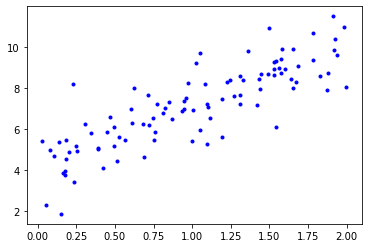

In [3]:
plt.plot(X, y, "b.") # para definir que gráfica haremos
plt.show() # para que salga por pantalla

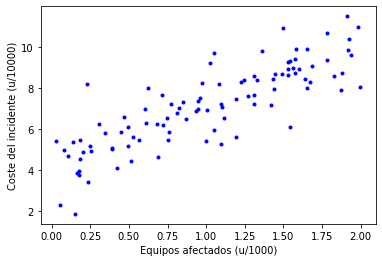

In [7]:
plt.plot(X, y, "b.")
plt.xlabel("Equipos afectados (u/1000)")
plt.ylabel("Coste del incidente (u/10000)")
plt.show()
# hay un coste fijo sea cual sea el nro de equipos que se estropea que es el intercepto

### 3. Modificación del conjunto de datos

In [5]:
import pandas as pd

In [6]:
data = {'n_equipos_afectados': X.flatten(), 'coste': y.flatten()}
df = pd.DataFrame(data)
df.head(10)
# el flatten tal y como hemos construido los datos con numpy, q son lista de listas
# y lo convierte en una lista (lo aplana)
#todo en minuscula con guiones

,n_equipos_afectados,coste
0,0.996161,5.445554
1,1.308597,7.649837
2,1.597858,8.959550
3,0.601386,6.995654
4,0.175918,3.755466
5,0.744364,6.545148
6,1.093938,5.270172
7,1.418788,7.182059
8,0.510536,4.446967
9,0.422011,4.129223


In [12]:
# Escalado del número de equipos afectados
#  necesitamos todo en la misma escala pues nos pueden salir errores en el test de
# hipotesis derivado de tener distintas escalas
df['n_equipos_afectados'] = df['n_equipos_afectados'] * 1000
df['n_equipos_afectados'] = df['n_equipos_afectados'].astype('int')
# Escalado del coste
df['coste'] = df['coste'] * 10000
df['coste'] = df['coste'].astype('int')
df.head(10)

,n_equipos_afectados,coste
0,996,54455
1,1308,76498
2,1597,89595
3,601,69956
4,175,37554
5,744,65451
6,1093,52701
7,1418,71820
8,510,44469
9,422,41292


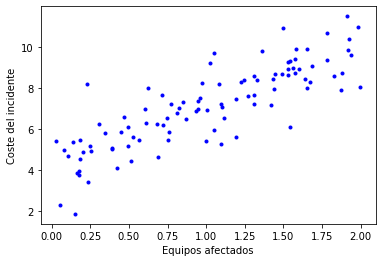

In [11]:
# Representación gráfica del conjunto de datos
plt.plot(df['n_equipos_afectados'], df['coste'], "b.")
plt.xlabel("Equipos afectados")
plt.ylabel("Coste del incidente")
plt.show()

### 4. Construcción del modelo

In [9]:
from sklearn.linear_model import LinearRegression 
# instanciamos la clas de LinearRegression

In [13]:
# Construcción del modelo y ajuste de la función hipótesis
lin_reg = LinearRegression()
lin_reg.fit(df['n_equipos_afectados'].values.reshape(-1, 1), df['coste'].values)
# nos referimos a .fit al ajuste del modelo (entrenamiento)
# values para sacar el vector, pasa a ser un array, reshape para hacer una matriz

LinearRegression()

In [23]:
# Parámetro theta 0
lin_reg.intercept_

42299.090664345276

In [24]:
# Parámetro theta 1
lin_reg.coef_
# un array pq puede haber varias variables de regresión

array([29.05721443])

Y = 37328.14 + 30.22*X

In [17]:
# Predicción para el valor mínimo y máximo del conjunto de datos de entrenamiento
X_min_max = np.array([[df["n_equipos_afectados"].min()], [df["n_equipos_afectados"].max()]])
y_train_pred = lin_reg.predict(X_min_max)
# introducimos los datos como matriz

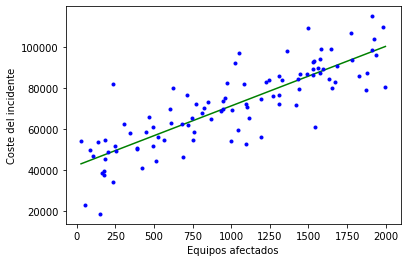

In [22]:
# Representación gráfica de la función hipótesis generada
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(df['n_equipos_afectados'], df['coste'], "b.")
plt.xlabel("Equipos afectados")
plt.ylabel("Coste del incidente")
plt.show()

### 5. Predicción de nuevos ejemplos

In [21]:
x_new = np.array([[1300]]) # 1300 equipos afectados

# Predicción del coste que tendría el incidente
coste = lin_reg.predict(x_new) 

print("El coste del incidente sería:", int(coste[0]), "€")

El coste del incidente sería: 80073 €


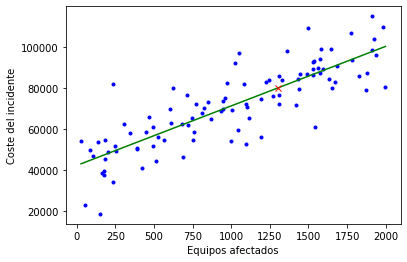

In [20]:
plt.plot(df['n_equipos_afectados'], df['coste'], "b.")
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(x_new, coste, "rx")
plt.xlabel("Equipos afectados")
plt.ylabel("Coste del incidente")
plt.show()